# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

60000
784


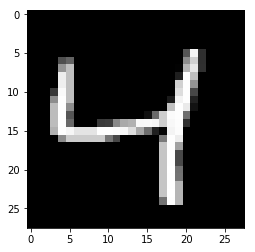

In [5]:
img = mnist.train.images[2]
print(len(mnist.train.images))
print(str(28 * 28))
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# scratch pad
print(mnist.train.images.shape)
print(len(mnist.train.images))

(60000, 784)
60000


In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

img_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, img_size), name = 'inputs')
targets_ = tf.placeholder(tf.float32, (None, img_size), name = 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs_, img_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7075
Epoch: 1/20... Training loss: 0.6738
Epoch: 1/20... Training loss: 0.6398
Epoch: 1/20... Training loss: 0.6055
Epoch: 1/20... Training loss: 0.5751
Epoch: 1/20... Training loss: 0.5586
Epoch: 1/20... Training loss: 0.5090
Epoch: 1/20... Training loss: 0.5056
Epoch: 1/20... Training loss: 0.4892
Epoch: 1/20... Training loss: 0.4600
Epoch: 1/20... Training loss: 0.4407
Epoch: 1/20... Training loss: 0.4293
Epoch: 1/20... Training loss: 0.4084
Epoch: 1/20... Training loss: 0.4035
Epoch: 1/20... Training loss: 0.3882
Epoch: 1/20... Training loss: 0.3809
Epoch: 1/20... Training loss: 0.3691
Epoch: 1/20... Training loss: 0.3683
Epoch: 1/20... Training loss: 0.3556
Epoch: 1/20... Training loss: 0.3414
Epoch: 1/20... Training loss: 0.3325
Epoch: 1/20... Training loss: 0.3267
Epoch: 1/20... Training loss: 0.3239
Epoch: 1/20... Training loss: 0.3259
Epoch: 1/20... Training loss: 0.3175
Epoch: 1/20... Training loss: 0.3062
Epoch: 1/20... Training loss: 0.3001
E

Epoch: 1/20... Training loss: 0.1595
Epoch: 1/20... Training loss: 0.1643
Epoch: 1/20... Training loss: 0.1571
Epoch: 1/20... Training loss: 0.1626
Epoch: 1/20... Training loss: 0.1682
Epoch: 1/20... Training loss: 0.1635
Epoch: 1/20... Training loss: 0.1732
Epoch: 1/20... Training loss: 0.1697
Epoch: 1/20... Training loss: 0.1677
Epoch: 1/20... Training loss: 0.1614
Epoch: 1/20... Training loss: 0.1610
Epoch: 1/20... Training loss: 0.1598
Epoch: 1/20... Training loss: 0.1552
Epoch: 1/20... Training loss: 0.1660
Epoch: 1/20... Training loss: 0.1650
Epoch: 1/20... Training loss: 0.1746
Epoch: 1/20... Training loss: 0.1565
Epoch: 1/20... Training loss: 0.1667
Epoch: 1/20... Training loss: 0.1632
Epoch: 1/20... Training loss: 0.1638
Epoch: 1/20... Training loss: 0.1574
Epoch: 1/20... Training loss: 0.1579
Epoch: 1/20... Training loss: 0.1692
Epoch: 1/20... Training loss: 0.1599
Epoch: 1/20... Training loss: 0.1671
Epoch: 1/20... Training loss: 0.1609
Epoch: 1/20... Training loss: 0.1646
E

Epoch: 2/20... Training loss: 0.1345
Epoch: 2/20... Training loss: 0.1339
Epoch: 2/20... Training loss: 0.1342
Epoch: 2/20... Training loss: 0.1299
Epoch: 2/20... Training loss: 0.1340
Epoch: 2/20... Training loss: 0.1377
Epoch: 2/20... Training loss: 0.1382
Epoch: 2/20... Training loss: 0.1347
Epoch: 2/20... Training loss: 0.1325
Epoch: 2/20... Training loss: 0.1329
Epoch: 2/20... Training loss: 0.1338
Epoch: 2/20... Training loss: 0.1333
Epoch: 2/20... Training loss: 0.1267
Epoch: 2/20... Training loss: 0.1320
Epoch: 2/20... Training loss: 0.1281
Epoch: 2/20... Training loss: 0.1354
Epoch: 2/20... Training loss: 0.1287
Epoch: 2/20... Training loss: 0.1315
Epoch: 2/20... Training loss: 0.1349
Epoch: 2/20... Training loss: 0.1319
Epoch: 2/20... Training loss: 0.1295
Epoch: 2/20... Training loss: 0.1327
Epoch: 2/20... Training loss: 0.1313
Epoch: 2/20... Training loss: 0.1317
Epoch: 2/20... Training loss: 0.1292
Epoch: 2/20... Training loss: 0.1324
Epoch: 2/20... Training loss: 0.1363
E

Epoch: 3/20... Training loss: 0.1201
Epoch: 3/20... Training loss: 0.1179
Epoch: 3/20... Training loss: 0.1227
Epoch: 3/20... Training loss: 0.1213
Epoch: 3/20... Training loss: 0.1174
Epoch: 3/20... Training loss: 0.1243
Epoch: 3/20... Training loss: 0.1175
Epoch: 3/20... Training loss: 0.1201
Epoch: 3/20... Training loss: 0.1199
Epoch: 3/20... Training loss: 0.1193
Epoch: 3/20... Training loss: 0.1177
Epoch: 3/20... Training loss: 0.1187
Epoch: 3/20... Training loss: 0.1213
Epoch: 3/20... Training loss: 0.1204
Epoch: 3/20... Training loss: 0.1172
Epoch: 3/20... Training loss: 0.1172
Epoch: 3/20... Training loss: 0.1163
Epoch: 3/20... Training loss: 0.1189
Epoch: 3/20... Training loss: 0.1190
Epoch: 3/20... Training loss: 0.1202
Epoch: 3/20... Training loss: 0.1188
Epoch: 3/20... Training loss: 0.1223
Epoch: 3/20... Training loss: 0.1201
Epoch: 3/20... Training loss: 0.1155
Epoch: 3/20... Training loss: 0.1196
Epoch: 3/20... Training loss: 0.1158
Epoch: 3/20... Training loss: 0.1186
E

Epoch: 3/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1073
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1070
Epoch: 4/20... Training loss: 0.1033
Epoch: 4/20... Training loss: 0.1073
Epoch: 4/20... Training loss: 0.1053
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1083
Epoch: 4/20... Training loss: 0.1075
Epoch: 4/20... Training loss: 0.1066
Epoch: 4/20... Training loss: 0.1089
Epoch: 4/20... Training loss: 0.1108
Epoch: 4/20... Training loss: 0.1075
Epoch: 4/20... Training loss: 0.1075
Epoch: 4/20... Training loss: 0.1078
Epoch: 4/20... Training loss: 0.1086
Epoch: 4/20... Training loss: 0.1068
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1058
Epoch: 4/20... Training loss: 0.1111
Epoch: 4/20... Training loss: 0.1076
Epoch: 4/20... Training loss: 0.1064
Epoch: 4/20... Training loss: 0.1097
Epoch: 4/20... Training loss: 0.1096
Epoch: 4/20... Training loss: 0.1089
E

Epoch: 4/20... Training loss: 0.1062
Epoch: 4/20... Training loss: 0.0984
Epoch: 4/20... Training loss: 0.1027
Epoch: 4/20... Training loss: 0.1032
Epoch: 4/20... Training loss: 0.1078
Epoch: 4/20... Training loss: 0.1011
Epoch: 4/20... Training loss: 0.1013
Epoch: 4/20... Training loss: 0.1045
Epoch: 4/20... Training loss: 0.0996
Epoch: 4/20... Training loss: 0.1026
Epoch: 4/20... Training loss: 0.1059
Epoch: 4/20... Training loss: 0.1020
Epoch: 4/20... Training loss: 0.1032
Epoch: 4/20... Training loss: 0.0998
Epoch: 4/20... Training loss: 0.1074
Epoch: 4/20... Training loss: 0.1019
Epoch: 4/20... Training loss: 0.1009
Epoch: 4/20... Training loss: 0.1048
Epoch: 4/20... Training loss: 0.1016
Epoch: 4/20... Training loss: 0.1026
Epoch: 4/20... Training loss: 0.1031
Epoch: 4/20... Training loss: 0.1011
Epoch: 4/20... Training loss: 0.1021
Epoch: 4/20... Training loss: 0.1054
Epoch: 4/20... Training loss: 0.1030
Epoch: 4/20... Training loss: 0.1033
Epoch: 4/20... Training loss: 0.1049
E

Epoch: 5/20... Training loss: 0.0964
Epoch: 5/20... Training loss: 0.0966
Epoch: 5/20... Training loss: 0.1008
Epoch: 5/20... Training loss: 0.0996
Epoch: 5/20... Training loss: 0.0983
Epoch: 5/20... Training loss: 0.0955
Epoch: 5/20... Training loss: 0.0969
Epoch: 5/20... Training loss: 0.0994
Epoch: 5/20... Training loss: 0.0961
Epoch: 5/20... Training loss: 0.0980
Epoch: 5/20... Training loss: 0.0968
Epoch: 5/20... Training loss: 0.0986
Epoch: 5/20... Training loss: 0.0993
Epoch: 5/20... Training loss: 0.0975
Epoch: 5/20... Training loss: 0.0976
Epoch: 5/20... Training loss: 0.0961
Epoch: 5/20... Training loss: 0.0965
Epoch: 5/20... Training loss: 0.0967
Epoch: 5/20... Training loss: 0.0976
Epoch: 5/20... Training loss: 0.0955
Epoch: 5/20... Training loss: 0.0958
Epoch: 5/20... Training loss: 0.1011
Epoch: 5/20... Training loss: 0.0951
Epoch: 5/20... Training loss: 0.0956
Epoch: 5/20... Training loss: 0.0994
Epoch: 5/20... Training loss: 0.0953
Epoch: 5/20... Training loss: 0.0992
E

Epoch: 6/20... Training loss: 0.0941
Epoch: 6/20... Training loss: 0.0903
Epoch: 6/20... Training loss: 0.0935
Epoch: 6/20... Training loss: 0.0941
Epoch: 6/20... Training loss: 0.0950
Epoch: 6/20... Training loss: 0.0928
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.0905
Epoch: 6/20... Training loss: 0.0960
Epoch: 6/20... Training loss: 0.0922
Epoch: 6/20... Training loss: 0.0912
Epoch: 6/20... Training loss: 0.0935
Epoch: 6/20... Training loss: 0.0922
Epoch: 6/20... Training loss: 0.0928
Epoch: 6/20... Training loss: 0.0918
Epoch: 6/20... Training loss: 0.0902
Epoch: 6/20... Training loss: 0.0940
Epoch: 6/20... Training loss: 0.0951
Epoch: 6/20... Training loss: 0.0876
Epoch: 6/20... Training loss: 0.0921
Epoch: 6/20... Training loss: 0.0942
Epoch: 6/20... Training loss: 0.0953
Epoch: 6/20... Training loss: 0.0934
Epoch: 6/20... Training loss: 0.0948
Epoch: 6/20... Training loss: 0.0926
Epoch: 6/20... Training loss: 0.0941
Epoch: 6/20... Training loss: 0.0918
E

Epoch: 6/20... Training loss: 0.0905
Epoch: 6/20... Training loss: 0.0934
Epoch: 6/20... Training loss: 0.0901
Epoch: 6/20... Training loss: 0.0898
Epoch: 6/20... Training loss: 0.0912
Epoch: 6/20... Training loss: 0.0890
Epoch: 6/20... Training loss: 0.0908
Epoch: 6/20... Training loss: 0.0857
Epoch: 7/20... Training loss: 0.0921
Epoch: 7/20... Training loss: 0.0904
Epoch: 7/20... Training loss: 0.0875
Epoch: 7/20... Training loss: 0.0870
Epoch: 7/20... Training loss: 0.0921
Epoch: 7/20... Training loss: 0.0883
Epoch: 7/20... Training loss: 0.0886
Epoch: 7/20... Training loss: 0.0884
Epoch: 7/20... Training loss: 0.0890
Epoch: 7/20... Training loss: 0.0896
Epoch: 7/20... Training loss: 0.0909
Epoch: 7/20... Training loss: 0.0880
Epoch: 7/20... Training loss: 0.0892
Epoch: 7/20... Training loss: 0.0873
Epoch: 7/20... Training loss: 0.0896
Epoch: 7/20... Training loss: 0.0887
Epoch: 7/20... Training loss: 0.0905
Epoch: 7/20... Training loss: 0.0891
Epoch: 7/20... Training loss: 0.0898
E

Epoch: 7/20... Training loss: 0.0897
Epoch: 7/20... Training loss: 0.0880
Epoch: 7/20... Training loss: 0.0857
Epoch: 7/20... Training loss: 0.0880
Epoch: 7/20... Training loss: 0.0840
Epoch: 7/20... Training loss: 0.0855
Epoch: 7/20... Training loss: 0.0862
Epoch: 7/20... Training loss: 0.0896
Epoch: 7/20... Training loss: 0.0881
Epoch: 7/20... Training loss: 0.0866
Epoch: 7/20... Training loss: 0.0884
Epoch: 7/20... Training loss: 0.0858
Epoch: 7/20... Training loss: 0.0850
Epoch: 7/20... Training loss: 0.0870
Epoch: 7/20... Training loss: 0.0853
Epoch: 7/20... Training loss: 0.0851
Epoch: 7/20... Training loss: 0.0874
Epoch: 7/20... Training loss: 0.0852
Epoch: 7/20... Training loss: 0.0889
Epoch: 7/20... Training loss: 0.0866
Epoch: 7/20... Training loss: 0.0880
Epoch: 7/20... Training loss: 0.0891
Epoch: 7/20... Training loss: 0.0887
Epoch: 7/20... Training loss: 0.0862
Epoch: 7/20... Training loss: 0.0876
Epoch: 7/20... Training loss: 0.0866
Epoch: 7/20... Training loss: 0.0861
E

Epoch: 8/20... Training loss: 0.0828
Epoch: 8/20... Training loss: 0.0827
Epoch: 8/20... Training loss: 0.0832
Epoch: 8/20... Training loss: 0.0857
Epoch: 8/20... Training loss: 0.0825
Epoch: 8/20... Training loss: 0.0831
Epoch: 8/20... Training loss: 0.0837
Epoch: 8/20... Training loss: 0.0854
Epoch: 8/20... Training loss: 0.0857
Epoch: 8/20... Training loss: 0.0847
Epoch: 8/20... Training loss: 0.0882
Epoch: 8/20... Training loss: 0.0839
Epoch: 8/20... Training loss: 0.0852
Epoch: 8/20... Training loss: 0.0844
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0838
Epoch: 8/20... Training loss: 0.0852
Epoch: 8/20... Training loss: 0.0828
Epoch: 8/20... Training loss: 0.0863
Epoch: 8/20... Training loss: 0.0829
Epoch: 8/20... Training loss: 0.0832
Epoch: 8/20... Training loss: 0.0854
Epoch: 8/20... Training loss: 0.0874
Epoch: 8/20... Training loss: 0.0801
Epoch: 8/20... Training loss: 0.0861
Epoch: 8/20... Training loss: 0.0854
Epoch: 8/20... Training loss: 0.0867
E

Epoch: 9/20... Training loss: 0.0794
Epoch: 9/20... Training loss: 0.0803
Epoch: 9/20... Training loss: 0.0808
Epoch: 9/20... Training loss: 0.0854
Epoch: 9/20... Training loss: 0.0812
Epoch: 9/20... Training loss: 0.0812
Epoch: 9/20... Training loss: 0.0815
Epoch: 9/20... Training loss: 0.0846
Epoch: 9/20... Training loss: 0.0834
Epoch: 9/20... Training loss: 0.0817
Epoch: 9/20... Training loss: 0.0802
Epoch: 9/20... Training loss: 0.0808
Epoch: 9/20... Training loss: 0.0828
Epoch: 9/20... Training loss: 0.0832
Epoch: 9/20... Training loss: 0.0827
Epoch: 9/20... Training loss: 0.0836
Epoch: 9/20... Training loss: 0.0845
Epoch: 9/20... Training loss: 0.0851
Epoch: 9/20... Training loss: 0.0821
Epoch: 9/20... Training loss: 0.0812
Epoch: 9/20... Training loss: 0.0832
Epoch: 9/20... Training loss: 0.0887
Epoch: 9/20... Training loss: 0.0811
Epoch: 9/20... Training loss: 0.0823
Epoch: 9/20... Training loss: 0.0815
Epoch: 9/20... Training loss: 0.0809
Epoch: 9/20... Training loss: 0.0821
E

Epoch: 9/20... Training loss: 0.0816
Epoch: 9/20... Training loss: 0.0806
Epoch: 9/20... Training loss: 0.0798
Epoch: 9/20... Training loss: 0.0806
Epoch: 9/20... Training loss: 0.0817
Epoch: 10/20... Training loss: 0.0801
Epoch: 10/20... Training loss: 0.0818
Epoch: 10/20... Training loss: 0.0800
Epoch: 10/20... Training loss: 0.0828
Epoch: 10/20... Training loss: 0.0826
Epoch: 10/20... Training loss: 0.0812
Epoch: 10/20... Training loss: 0.0808
Epoch: 10/20... Training loss: 0.0804
Epoch: 10/20... Training loss: 0.0820
Epoch: 10/20... Training loss: 0.0801
Epoch: 10/20... Training loss: 0.0794
Epoch: 10/20... Training loss: 0.0777
Epoch: 10/20... Training loss: 0.0821
Epoch: 10/20... Training loss: 0.0799
Epoch: 10/20... Training loss: 0.0797
Epoch: 10/20... Training loss: 0.0794
Epoch: 10/20... Training loss: 0.0809
Epoch: 10/20... Training loss: 0.0812
Epoch: 10/20... Training loss: 0.0772
Epoch: 10/20... Training loss: 0.0795
Epoch: 10/20... Training loss: 0.0806
Epoch: 10/20... T

Epoch: 10/20... Training loss: 0.0797
Epoch: 10/20... Training loss: 0.0787
Epoch: 10/20... Training loss: 0.0775
Epoch: 10/20... Training loss: 0.0789
Epoch: 10/20... Training loss: 0.0794
Epoch: 10/20... Training loss: 0.0785
Epoch: 10/20... Training loss: 0.0777
Epoch: 10/20... Training loss: 0.0779
Epoch: 10/20... Training loss: 0.0815
Epoch: 10/20... Training loss: 0.0789
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0787
Epoch: 10/20... Training loss: 0.0784
Epoch: 10/20... Training loss: 0.0791
Epoch: 10/20... Training loss: 0.0790
Epoch: 10/20... Training loss: 0.0796
Epoch: 10/20... Training loss: 0.0790
Epoch: 10/20... Training loss: 0.0785
Epoch: 10/20... Training loss: 0.0815
Epoch: 10/20... Training loss: 0.0784
Epoch: 10/20... Training loss: 0.0789
Epoch: 10/20... Training loss: 0.0796
Epoch: 10/20... Training loss: 0.0783
Epoch: 10/20... Training loss: 0.0781
Epoch: 10/20... Training loss: 0.0786
Epoch: 10/20... Training loss: 0.0777
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0750
Epoch: 11/20... Training loss: 0.0749
Epoch: 11/20... Training loss: 0.0797
Epoch: 11/20... Training loss: 0.0779
Epoch: 11/20... Training loss: 0.0798
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0778
Epoch: 11/20... Training loss: 0.0776
Epoch: 11/20... Training loss: 0.0784
Epoch: 11/20... Training loss: 0.0750
Epoch: 11/20... Training loss: 0.0765
Epoch: 11/20... Training loss: 0.0772
Epoch: 11/20... Training loss: 0.0801
Epoch: 11/20... Training loss: 0.0782
Epoch: 11/20... Training loss: 0.0763
Epoch: 11/20... Training loss: 0.0775
Epoch: 11/20... Training loss: 0.0765
Epoch: 11/20... Training loss: 0.0769
Epoch: 11/20... Training loss: 0.0755
Epoch: 11/20... Training loss: 0.0761
Epoch: 11/20... Training loss: 0.0776
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0762
Epoch: 11/20... Training loss: 0.0759
Epoch: 11/20... Training loss: 0.0764
Epoch: 11/20... Training loss: 0.0771
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0767
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0754
Epoch: 12/20... Training loss: 0.0739
Epoch: 12/20... Training loss: 0.0759
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0755
Epoch: 12/20... Training loss: 0.0777
Epoch: 12/20... Training loss: 0.0762
Epoch: 12/20... Training loss: 0.0759
Epoch: 12/20... Training loss: 0.0765
Epoch: 12/20... Training loss: 0.0767
Epoch: 12/20... Training loss: 0.0761
Epoch: 12/20... Training loss: 0.0770
Epoch: 12/20... Training loss: 0.0789
Epoch: 12/20... Training loss: 0.0764
Epoch: 12/20... Training loss: 0.0750
Epoch: 12/20... Training loss: 0.0770
Epoch: 12/20... Training loss: 0.0769
Epoch: 12/20... Training loss: 0.0748
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0754
Epoch: 12/20... Training loss: 0.0761
Epoch: 12/20... Training loss: 0.0728
Epoch: 12/20... Training loss: 0.0735
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0744
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0757
Epoch: 12/20... Training loss: 0.0746
Epoch: 12/20... Training loss: 0.0738
Epoch: 12/20... Training loss: 0.0745
Epoch: 12/20... Training loss: 0.0750
Epoch: 12/20... Training loss: 0.0754
Epoch: 12/20... Training loss: 0.0763
Epoch: 12/20... Training loss: 0.0722
Epoch: 12/20... Training loss: 0.0770
Epoch: 12/20... Training loss: 0.0734
Epoch: 12/20... Training loss: 0.0741
Epoch: 12/20... Training loss: 0.0755
Epoch: 12/20... Training loss: 0.0746
Epoch: 12/20... Training loss: 0.0742
Epoch: 12/20... Training loss: 0.0750
Epoch: 12/20... Training loss: 0.0738
Epoch: 12/20... Training loss: 0.0739
Epoch: 12/20... Training loss: 0.0749
Epoch: 12/20... Training loss: 0.0768
Epoch: 12/20... Training loss: 0.0722
Epoch: 12/20... Training loss: 0.0752
Epoch: 12/20... Training loss: 0.0759
Epoch: 12/20... Training loss: 0.0723
Epoch: 12/20... Training loss: 0.0772
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0739
Epoch: 13/20... Training loss: 0.0739
Epoch: 13/20... Training loss: 0.0746
Epoch: 13/20... Training loss: 0.0738
Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0731
Epoch: 13/20... Training loss: 0.0758
Epoch: 13/20... Training loss: 0.0761
Epoch: 13/20... Training loss: 0.0725
Epoch: 13/20... Training loss: 0.0734
Epoch: 13/20... Training loss: 0.0750
Epoch: 13/20... Training loss: 0.0734
Epoch: 13/20... Training loss: 0.0737
Epoch: 13/20... Training loss: 0.0744
Epoch: 13/20... Training loss: 0.0734
Epoch: 13/20... Training loss: 0.0734
Epoch: 13/20... Training loss: 0.0747
Epoch: 13/20... Training loss: 0.0762
Epoch: 13/20... Training loss: 0.0739
Epoch: 13/20... Training loss: 0.0743
Epoch: 13/20... Training loss: 0.0763
Epoch: 13/20... Training loss: 0.0735
Epoch: 13/20... Training loss: 0.0732
Epoch: 13/20... Training loss: 0.0734
Epoch: 13/20... Training loss: 0.0748
Epoch: 13/20... Training loss: 0.0736
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0712
Epoch: 14/20... Training loss: 0.0705
Epoch: 14/20... Training loss: 0.0731
Epoch: 14/20... Training loss: 0.0724
Epoch: 14/20... Training loss: 0.0738
Epoch: 14/20... Training loss: 0.0755
Epoch: 14/20... Training loss: 0.0728
Epoch: 14/20... Training loss: 0.0740
Epoch: 14/20... Training loss: 0.0716
Epoch: 14/20... Training loss: 0.0742
Epoch: 14/20... Training loss: 0.0733
Epoch: 14/20... Training loss: 0.0713
Epoch: 14/20... Training loss: 0.0730
Epoch: 14/20... Training loss: 0.0733
Epoch: 14/20... Training loss: 0.0734
Epoch: 14/20... Training loss: 0.0735
Epoch: 14/20... Training loss: 0.0738
Epoch: 14/20... Training loss: 0.0737
Epoch: 14/20... Training loss: 0.0743
Epoch: 14/20... Training loss: 0.0719
Epoch: 14/20... Training loss: 0.0735
Epoch: 14/20... Training loss: 0.0748
Epoch: 14/20... Training loss: 0.0716
Epoch: 14/20... Training loss: 0.0717
Epoch: 14/20... Training loss: 0.0715
Epoch: 14/20... Training loss: 0.0725
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0712
Epoch: 15/20... Training loss: 0.0702
Epoch: 15/20... Training loss: 0.0717
Epoch: 15/20... Training loss: 0.0732
Epoch: 15/20... Training loss: 0.0721
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0722
Epoch: 15/20... Training loss: 0.0717
Epoch: 15/20... Training loss: 0.0726
Epoch: 15/20... Training loss: 0.0713
Epoch: 15/20... Training loss: 0.0711
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0711
Epoch: 15/20... Training loss: 0.0732
Epoch: 15/20... Training loss: 0.0711
Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0709
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0701
Epoch: 15/20... Training loss: 0.0726
Epoch: 15/20... Training loss: 0.0711
Epoch: 15/20... Training loss: 0.0723
Epoch: 15/20... Training loss: 0.0718
Epoch: 15/20... Training loss: 0.0696
Epoch: 15/20... Training loss: 0.0717
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0689
Epoch: 15/20... Training loss: 0.0720
Epoch: 15/20... Training loss: 0.0696
Epoch: 15/20... Training loss: 0.0713
Epoch: 15/20... Training loss: 0.0720
Epoch: 15/20... Training loss: 0.0726
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0703
Epoch: 15/20... Training loss: 0.0720
Epoch: 15/20... Training loss: 0.0689
Epoch: 15/20... Training loss: 0.0718
Epoch: 15/20... Training loss: 0.0733
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0707
Epoch: 15/20... Training loss: 0.0729
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0714
Epoch: 15/20... Training loss: 0.0712
Epoch: 15/20... Training loss: 0.0712
Epoch: 15/20... Training loss: 0.0707
Epoch: 15/20... Training loss: 0.0721
Epoch: 15/20... Training loss: 0.0697
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0700
Epoch: 15/20... Training loss: 0.0710
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0723
Epoch: 16/20... Training loss: 0.0717
Epoch: 16/20... Training loss: 0.0714
Epoch: 16/20... Training loss: 0.0701
Epoch: 16/20... Training loss: 0.0705
Epoch: 16/20... Training loss: 0.0686
Epoch: 16/20... Training loss: 0.0691
Epoch: 16/20... Training loss: 0.0708
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0706
Epoch: 16/20... Training loss: 0.0722
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0722
Epoch: 16/20... Training loss: 0.0701
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20... Training loss: 0.0696
Epoch: 16/20... Training loss: 0.0682
Epoch: 16/20... Training loss: 0.0697
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20... Training loss: 0.0697
Epoch: 16/20... Training loss: 0.0705
Epoch: 16/20... Training loss: 0.0702
Epoch: 16/20... Training loss: 0.0716
Epoch: 16/20... Training loss: 0.0720
Epoch: 16/20... Training loss: 0.0720
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0689
Epoch: 17/20... Training loss: 0.0721
Epoch: 17/20... Training loss: 0.0691
Epoch: 17/20... Training loss: 0.0689
Epoch: 17/20... Training loss: 0.0680
Epoch: 17/20... Training loss: 0.0678
Epoch: 17/20... Training loss: 0.0675
Epoch: 17/20... Training loss: 0.0709
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0682
Epoch: 17/20... Training loss: 0.0703
Epoch: 17/20... Training loss: 0.0705
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0698
Epoch: 17/20... Training loss: 0.0679
Epoch: 17/20... Training loss: 0.0692
Epoch: 17/20... Training loss: 0.0709
Epoch: 17/20... Training loss: 0.0696
Epoch: 17/20... Training loss: 0.0689
Epoch: 17/20... Training loss: 0.0712
Epoch: 17/20... Training loss: 0.0682
Epoch: 17/20... Training loss: 0.0713
Epoch: 17/20... Training loss: 0.0708
Epoch: 17/20... Training loss: 0.0707
Epoch: 17/20... Training loss: 0.0707
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0717
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0676
Epoch: 17/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0673
Epoch: 18/20... Training loss: 0.0695
Epoch: 18/20... Training loss: 0.0704
Epoch: 18/20... Training loss: 0.0704
Epoch: 18/20... Training loss: 0.0700
Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0715
Epoch: 18/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0714
Epoch: 18/20... Training loss: 0.0701
Epoch: 18/20... Training loss: 0.0714
Epoch: 18/20... Training loss: 0.0679
Epoch: 18/20... Training loss: 0.0669
Epoch: 18/20... Training loss: 0.0684
Epoch: 18/20... Training loss: 0.0695
Epoch: 18/20... Training loss: 0.0672
Epoch: 18/20... Training loss: 0.0710
Epoch: 18/20... Training loss: 0.0707
Epoch: 18/20... Training loss: 0.0703
Epoch: 18/20... Training loss: 0.0686
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0707
Epoch: 18/20... Training loss: 0.0692
Epoch: 18/20... Training loss: 0.0695
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0682
Epoch: 18/20... Training loss: 0.0688
Epoch: 18/20... Training loss: 0.0691
Epoch: 18/20... Training loss: 0.0691
Epoch: 18/20... Training loss: 0.0690
Epoch: 18/20... Training loss: 0.0676
Epoch: 18/20... Training loss: 0.0691
Epoch: 18/20... Training loss: 0.0667
Epoch: 18/20... Training loss: 0.0689
Epoch: 18/20... Training loss: 0.0687
Epoch: 18/20... Training loss: 0.0678
Epoch: 18/20... Training loss: 0.0687
Epoch: 18/20... Training loss: 0.0709
Epoch: 18/20... Training loss: 0.0682
Epoch: 18/20... Training loss: 0.0683
Epoch: 18/20... Training loss: 0.0696
Epoch: 18/20... Training loss: 0.0695
Epoch: 18/20... Training loss: 0.0683
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0693
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0693
Epoch: 19/20... Training loss: 0.0677
Epoch: 19/20... Training loss: 0.0691
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0667
Epoch: 19/20... Training loss: 0.0675
Epoch: 19/20... Training loss: 0.0688
Epoch: 19/20... Training loss: 0.0675
Epoch: 19/20... Training loss: 0.0693
Epoch: 19/20... Training loss: 0.0677
Epoch: 19/20... Training loss: 0.0685
Epoch: 19/20... Training loss: 0.0690
Epoch: 19/20... Training loss: 0.0667
Epoch: 19/20... Training loss: 0.0682
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0659
Epoch: 19/20... Training loss: 0.0675
Epoch: 19/20... Training loss: 0.0702
Epoch: 19/20... Training loss: 0.0682
Epoch: 19/20... Training loss: 0.0700
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0681
Epoch: 19/20... Training loss: 0.0688
Epoch: 19/20... Training loss: 0.0694
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0677
Epoch: 20/20... Training loss: 0.0701
Epoch: 20/20... Training loss: 0.0686
Epoch: 20/20... Training loss: 0.0686
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0681
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20... Training loss: 0.0678
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0672
Epoch: 20/20... Training loss: 0.0702
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0688
Epoch: 20/20... Training loss: 0.0687
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0680
Epoch: 20/20... Training loss: 0.0662
Epoch: 20/20... Training loss: 0.0692
Epoch: 20/20... Training loss: 0.0676
Epoch: 20/20... Training loss: 0.0681
Epoch: 20/20... Training loss: 0.0685
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0681
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0682
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0656
Epoch: 20/20... Training loss: 0.0679
Epoch: 20/20... Training loss: 0.0685
Epoch: 20/20... Training loss: 0.0688
Epoch: 20/20... Training loss: 0.0682
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0685
Epoch: 20/20... Training loss: 0.0659
Epoch: 20/20... Training loss: 0.0656
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0685
Epoch: 20/20... Training loss: 0.0682
Epoch: 20/20... Training loss: 0.0664
Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0692
Epoch: 20/20... Training loss: 0.0656
Epoch: 20/20... Training loss: 0.0671
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20... Training loss: 0.0672
Epoch: 20/20... Training loss: 0.0678
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

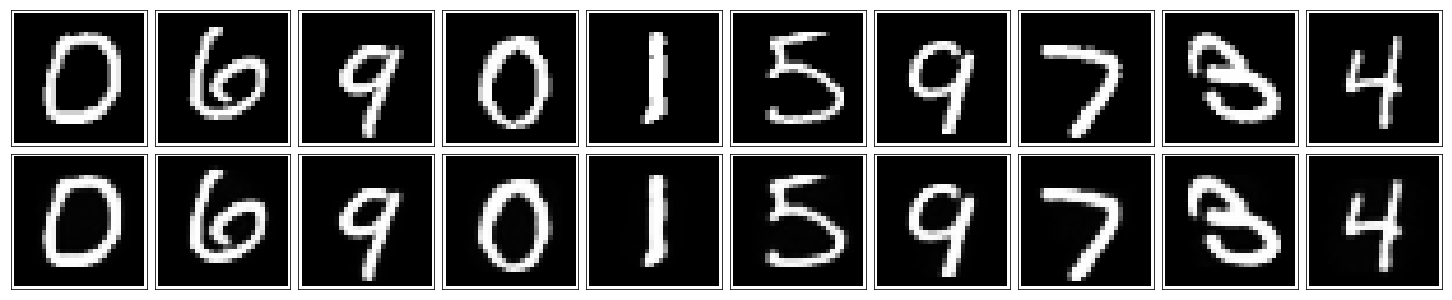

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[10:20]

# run the encoder on in_imgs

reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [14]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.